# CS 4820
# Assignment 10: Comparing ANN and CNN on the CIFAR-10 DataSet

In this assignment, we are going to compare two classification models on the  [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset -- one is based on Fully-connected ANN; the other one is based on Convolutional NN.

## 1. Loading the CIFAR-10 dataset

In [1]:
# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("Shape of training data:")
X_train.shape
y_train.shape
print("Shape of test data:")
X_test.shape
y_test.shape

Shape of training data:


(50000, 32, 32, 3)

(50000, 1)

Shape of test data:


(10000, 32, 32, 3)

(10000, 1)

We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

In [4]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    axarr[i].imshow(X_train[i])

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


## 2. Fully-connected ANN Classifier

First of all, you need to __scale__ and __reshape__ the data.

In [5]:
X_train_sc = X_train.astype('float32') / 255.0
X_test_sc = X_test.astype('float32') / 255.0

X_train_flat = X_train_sc.reshape(-1, 32*32*3)
X_test_flat = X_test_sc.reshape(-1, 32*32*3)

X_train_flat.shape
X_test_flat.shape

(50000, 3072)

(10000, 3072)

You also need to one-hot encode the targets.

In [6]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train_cat.shape
y_test_cat.shape

(50000, 10)

(10000, 10)

Then build a fully-connected ANN model. The architecure of the model is totally up to you.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(200, input_dim=3072, activation='relu'))
model.add(Dense(146, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 146)               29346     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                9408      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 654,004
Trainable params: 654,004
Non-trainable params: 0
_________________________________________________________________


Train the model.

In [8]:
h = model.fit(X_train_flat, y_train_cat, batch_size=128,
              epochs=10, verbose=1,
              validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 4s 78us/sample - loss: 2.0660 - accuracy: 0.2551 - val_loss: 1.9570 - val_accuracy: 0.2984
Epoch 2/10
45000/45000 [==============================] - 3s 71us/sample - loss: 1.8076 - accuracy: 0.3486 - val_loss: 1.8449 - val_accuracy: 0.3322
Epoch 3/10
45000/45000 [==============================] - 3s 71us/sample - loss: 1.7258 - accuracy: 0.3821 - val_loss: 1.8139 - val_accuracy: 0.3578
Epoch 4/10
45000/45000 [==============================] - 3s 75us/sample - loss: 1.6624 - accuracy: 0.4065 - val_loss: 1.7295 - val_accuracy: 0.3836
Epoch 5/10
45000/45000 [==============================] - 3s 72us/sample - loss: 1.6107 - accuracy: 0.4273 - val_loss: 1.6537 - val_accuracy: 0.4056
Epoch 6/10
45000/45000 [==============================] - 3s 72us/sample - loss: 1.5721 - accuracy: 0.4395 - val_loss: 1.5891 - val_accuracy: 0.4338
Epoch 7/10
45000/45000 [==============================] -

Plot the training history (like what was done in Tutorial 10).

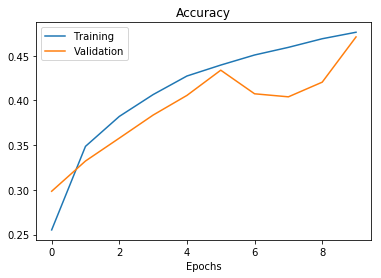

In [9]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');

Check the performance on the training and testing datasets respectively (like what was done in Tutorial 10).

In [10]:
train_acc = model.evaluate(X_train_flat, y_train_cat,
                           verbose=0)[1]
test_acc = model.evaluate(X_test_flat, y_test_cat,
                          verbose=0)[1]

print("Train accuracy: {:0.4f}".format(train_acc))
print("Test accuracy: {:0.4f}".format(test_acc))

Train accuracy: 0.5010
Test accuracy: 0.4713


For your reference, below was how the accurary results of my model looked like during training:

![ann_training_history](./assets/ann_training_history.png)


Below was the performace of my model on the training and testing datasets respectively:

- Train accuracy: 0.4599
- Test accuracy: 0.4344

## 3. CNN Classifier


Ensure that the dataset is ready for the convolution.

In [11]:
X_train_t = X_train_sc.reshape(-1, 32, 32, 3)
X_test_t = X_test_sc.reshape(-1, 32, 32, 3)

X_train_t.shape
X_test_t.shape

(50000, 32, 32, 3)

(10000, 32, 32, 3)

Then build a CNN-based model. The architecure of the model is totally up to you.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense

from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),
                 kernel_initializer='normal'))
model_2.add(MaxPooling2D(pool_size=(3, 3)))
model_2.add(Activation('relu'))
model_2.add(Flatten())
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(85, activation='relu'))
model_2.add(Dense(34, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               320100    
_________________________________________________________________
dense_5 (Dense)              (None, 85)                8585      
_________________________________________________________________
dense_6 (Dense)              (None, 34)               

Train the model.

In [13]:
h_2 = model_2.fit(X_train_t, y_train_cat, batch_size=120,
              epochs=25, verbose=1, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 14s 301us/sample - loss: 1.8000 - accuracy: 0.3437 - val_loss: 1.4963 - val_accuracy: 0.4718
Epoch 2/25
45000/45000 [==============================] - 13s 297us/sample - loss: 1.4471 - accuracy: 0.4842 - val_loss: 1.3522 - val_accuracy: 0.5152
Epoch 3/25
45000/45000 [==============================] - 13s 299us/sample - loss: 1.2931 - accuracy: 0.5420 - val_loss: 1.2241 - val_accuracy: 0.5596
Epoch 4/25
45000/45000 [==============================] - 13s 298us/sample - loss: 1.1836 - accuracy: 0.5843 - val_loss: 1.1321 - val_accuracy: 0.5996
Epoch 5/25
45000/45000 [==============================] - 13s 296us/sample - loss: 1.0974 - accuracy: 0.6161 - val_loss: 1.0979 - val_accuracy: 0.6182
Epoch 6/25
45000/45000 [==============================] - 13s 299us/sample - loss: 1.0224 - accuracy: 0.6434 - val_loss: 1.0928 - val_accuracy: 0.6258
Epoch 7/25
45000/45000 [=====================

Plot the training history (like what was done in Tutorial 10).

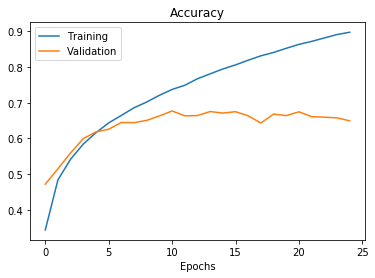

In [16]:
import matplotlib.pyplot as plt

plt.plot(h_2.history['accuracy'])
plt.plot(h_2.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');

Check the performance on the training and testing datasets respectively (like what was done in Tutorial 10).

In [17]:
train_acc_2 = model_2.evaluate(X_train_t, y_train_cat,
                           verbose=0)[1]
test_acc_2 = model_2.evaluate(X_test_t, y_test_cat,
                          verbose=0)[1]

print("Train accuracy: {:0.4f}".format(train_acc_2))
print("Test accuracy: {:0.4f}".format(test_acc_2))

Train accuracy: 0.8897
Test accuracy: 0.6357


For your reference, below was how the accurary results of my model looked like during training:

![cnn_training_history](./assets/cnn_training_history.png)


Below was the performace of my model on the training and testing datasets respectively:

- Train accuracy: 0.9258
- Test accuracy: 0.6789

As you could see, the CNN-based classifier achieved a much better performance than the ANN-based model. Apparently, overfitting still occured. To avoid this, additional regularization techniques such as dropping, batch normalization, data Augmentation, etc. could be applied. However, we are running out of time as this semester is getting to its end. I will leave these techniques to you as after-class research.